In [1]:
import os
import numpy as np
import pandas as pd
import lib.galaxy_utilities as gu
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
import lib.make_cutouts as mkct
import gzbuilder_analysis.rendering as rg
import reproject

In [2]:
fitting_metadata = pd.read_pickle('lib/fitting_metadata.pkl')

In [3]:
fitting_metadata.info()

<class 'pandas.core.frame.DataFrame'>
UInt64Index: 296 entries, 20901989 to 21686565
Data columns (total 7 columns):
psf              296 non-null object
pixel_mask       296 non-null object
galaxy_data      296 non-null object
original_data    296 non-null object
sigma_image      296 non-null object
width            296 non-null int64
size_diff        296 non-null float64
dtypes: float64(1), int64(1), object(5)
memory usage: 18.5+ KB


In [4]:
D = fitting_metadata['galaxy_data'].values
O = fitting_metadata['original_data'].values
M = fitting_metadata['pixel_mask'].values

In [5]:
f, axs = plt.subplots(ncols=6, nrows=6, dpi=150, figsize=(8, 8))
ax = axs.ravel()
for i in range(36):
    c = ax[i].imshow((D[i] - O[i])*M[i], vmin=-0.02, vmax=0.02, cmap='coolwarm')
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.colorbar(c, ax=axs, aspect=50)

What about the resulting sigma_images?

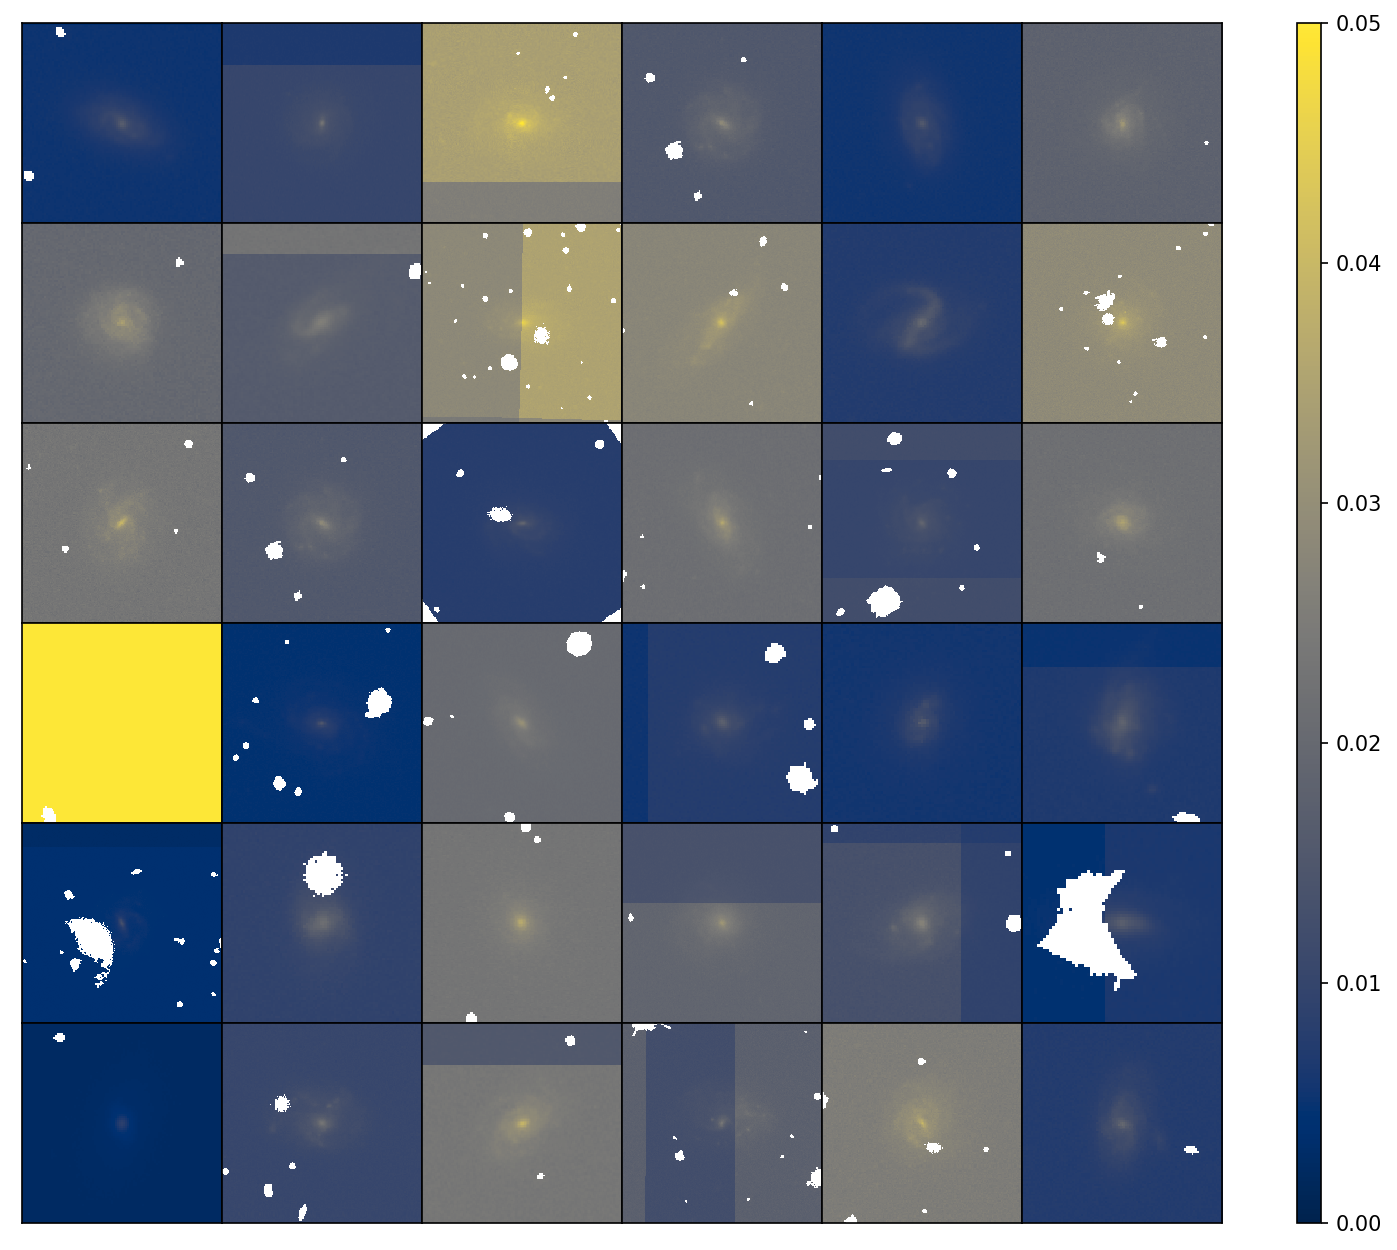

In [6]:
f, axs = plt.subplots(ncols=6, nrows=6, dpi=150, figsize=(10, 8))
ax = axs.ravel()
s = fitting_metadata[['sigma_image', 'pixel_mask']].sample(36)
for i in range(36):
    m = s.iloc[i]['pixel_mask']
    m[m == 0] = np.nan
    c = ax[i].imshow(s.iloc[i]['sigma_image']*s.iloc[i]['pixel_mask'], cmap='cividis', vmin=0, vmax=0.05)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)
plt.colorbar(c, ax=axs, aspect=50, shrink=1)